In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector
from sklearn.feature_selection import SelectFromModel

In [3]:
attr = pd.read_csv("/kaggle/input/attrition/Attrition data.csv") 
attr.head() # loading Dataset

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
attr.shape # Dimension

(4410, 29)

In [5]:
attr.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [6]:
attr.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
attr.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


### Missing Value Imputations

In [8]:
attr.isnull().sum()[attr.isnull().sum() > 0]

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [9]:
(attr.isnull().sum()/len(attr))[(attr.isnull().sum()/len(attr)) > 0]

NumCompaniesWorked         0.004308
TotalWorkingYears          0.002041
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
WorkLifeBalance            0.008617
dtype: float64

In [10]:
missing_value_columns = list(attr.isnull().sum()[attr.isnull().sum() > 0].index)
missing_value_columns

['NumCompaniesWorked',
 'TotalWorkingYears',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [11]:
attr.loc[:,missing_value_columns].head() # missing value containing variables

,NumCompaniesWorked,TotalWorkingYears,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1.0,1.0,3.0,4.0,2.0
1,0.0,6.0,3.0,2.0,4.0
2,1.0,5.0,2.0,2.0,1.0
3,3.0,13.0,4.0,4.0,3.0
4,4.0,9.0,4.0,1.0,3.0


The columns that contains missing values is `not more than 0.01%`. So we can do `mode imputations` on the `categorical` variables and `median` imputations on the `numerical` variables.

In [12]:
attr.TotalWorkingYears.fillna(attr.TotalWorkingYears.mode()[0], inplace=True)

/tmp/ipykernel_33/2452314205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attr.TotalWorkingYears.fillna(attr.TotalWorkingYears.mode()[0], inplace=True)


In [13]:
attr.TotalWorkingYears.isna().sum()

0

In [14]:
missing_value_columns.remove('TotalWorkingYears')

In [15]:
missing_value_columns

['NumCompaniesWorked',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [16]:
for col in missing_value_columns:
    attr[col].fillna(attr[col].mode()[0],inplace=True)

/tmp/ipykernel_33/2250155161.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attr[col].fillna(attr[col].mode()[0],inplace=True)


In [17]:
attr.isna().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [18]:
attr.duplicated().sum() # no duplicate value

0

### Visualization 

In [19]:
list(attr.nunique()[attr.nunique() ==1].index) # columns that have only one value

['EmployeeCount', 'Over18', 'StandardHours']

In [20]:
attr.drop(list(attr.nunique()[attr.nunique() ==1].index),axis = 1, inplace= True)
attr.shape

(4410, 26)

In [21]:
def barplot_categorical(df,cate_col):
    plt.figure(figsize=(10,20))
    list_len = len(cate_col)
    mid = int(np.ceil(list_len/2))
    i = 1
    for col in cate_col:
        plt.subplot(mid,2,i)    
        sns.countplot(data=df,x=col)
        plt.xticks(rotation = 45,size = 12)
        i = i+1
    plt.subplots_adjust(left=0.1,bottom=0.001, right=1.5, top=2, wspace=0.4, hspace=1)
plt.show()

In [22]:
cat = list(attr.nunique()[attr.nunique() <10].index)
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

In [ ]:
barplot_categorical(attr,cat)

In [24]:
def histogram_num(df,num_col):
    plt.figure(figsize=(10,20))
    list_len = len(num_col)
    mid = int(np.ceil(list_len/2))
    i = 1
    for col in num_col:
        plt.subplot(mid,2,i)
        df[col].hist(figsize=(15,10),color='pink',edgecolor='black')
        plt.grid(color='green',linestyle = '--', linewidth = 0.5)
        plt.xlabel(col, fontsize=20)
        i = i+1
    plt.subplots_adjust(left=0.1,bottom=0.01, right=1.5, top=2, wspace=0.4, hspace=0.3)
plt.show()

In [27]:
attr.nunique()[attr.nunique() >=10] # finding numerical columns by finding unique values in each column

EmployeeID                 4410
Age                          43
DistanceFromHome             29
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
TotalWorkingYears            40
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [28]:
attr.drop('EmployeeID',axis =1,inplace=True) # EmployeeID is not required
attr.shape

(4410, 25)

In [29]:
attr_num_col = list(attr.nunique()[attr.nunique() >=10].index)
attr_num_col

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
histogram_num(attr,attr_num_col)

In [29]:
def box_num(df,num_col):
    list_len = len(num_col)
    mid = int(np.ceil(list_len/2))
    (df.loc[:,num_col]).plot(kind='box',subplots=True,layout=(mid,2),figsize=(15,20))
    plt.show()

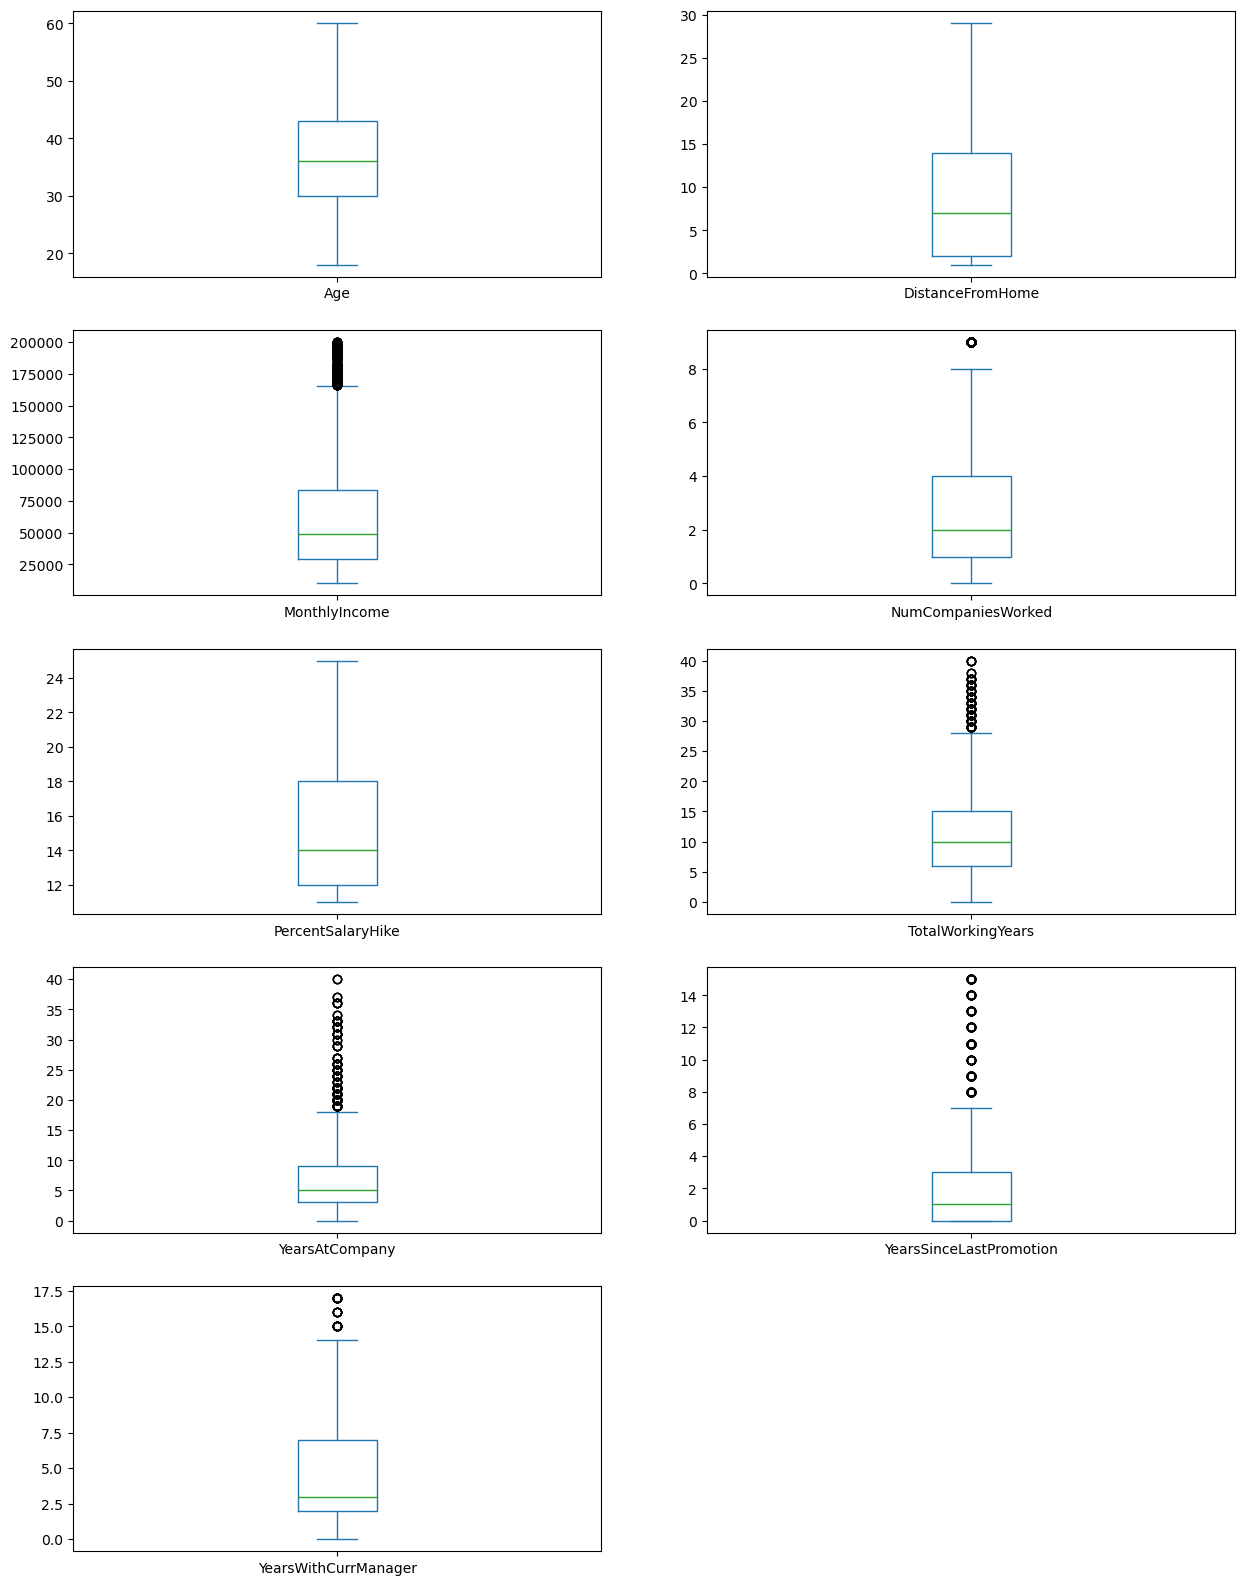

In [30]:
box_num(attr,attr_num_col)

**Interpretetion:**

1. Around **16%** employees `left` the company.

2. Maximum emplyees work in `Research & Developement`(**65%**).

3. Emplyoes mainly study on `Life Science`(**41%**) & `Medical`(**32%**). Clearly the company mainly works in **Medical** Domain.

4. Most employees work in `three roles` ; `Sales Executive`(**22%**), `Research Scientist`(**20%**), `Laboratory Technician`(**18%**).

5. Around **50 %** emplyees are `in between` `30 years to 43 years` of old.

6. Thsi company offers `half of the employess` **less than 50,000 rupees** as salary.

7. More than **50 %** employees works `10 hours or more`.

In [31]:
pd.crosstab(attr.Attrition,attr.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,132,2430,1137
Yes,57,453,201


In [32]:
def crosstab_plot(df,dep_col,cat_col):
    plt.figure(figsize=(10,20))
    cat_col.remove(dep_col)
    list_len = len(cat_col)
    mid = int(np.ceil(list_len/2))
    i = 1
    for col in cat_col:
        plt.subplot(mid,2,i)
        pd.crosstab(df[dep_col],df[col]).plot(kind = 'bar',ax=plt.gca())
        i = i+1
    cat_col.append(dep_col)
    plt.subplots_adjust(left=0.1,bottom=0.01, right=1.5, top=2, wspace=0.4, hspace=0.3)
    plt.show()

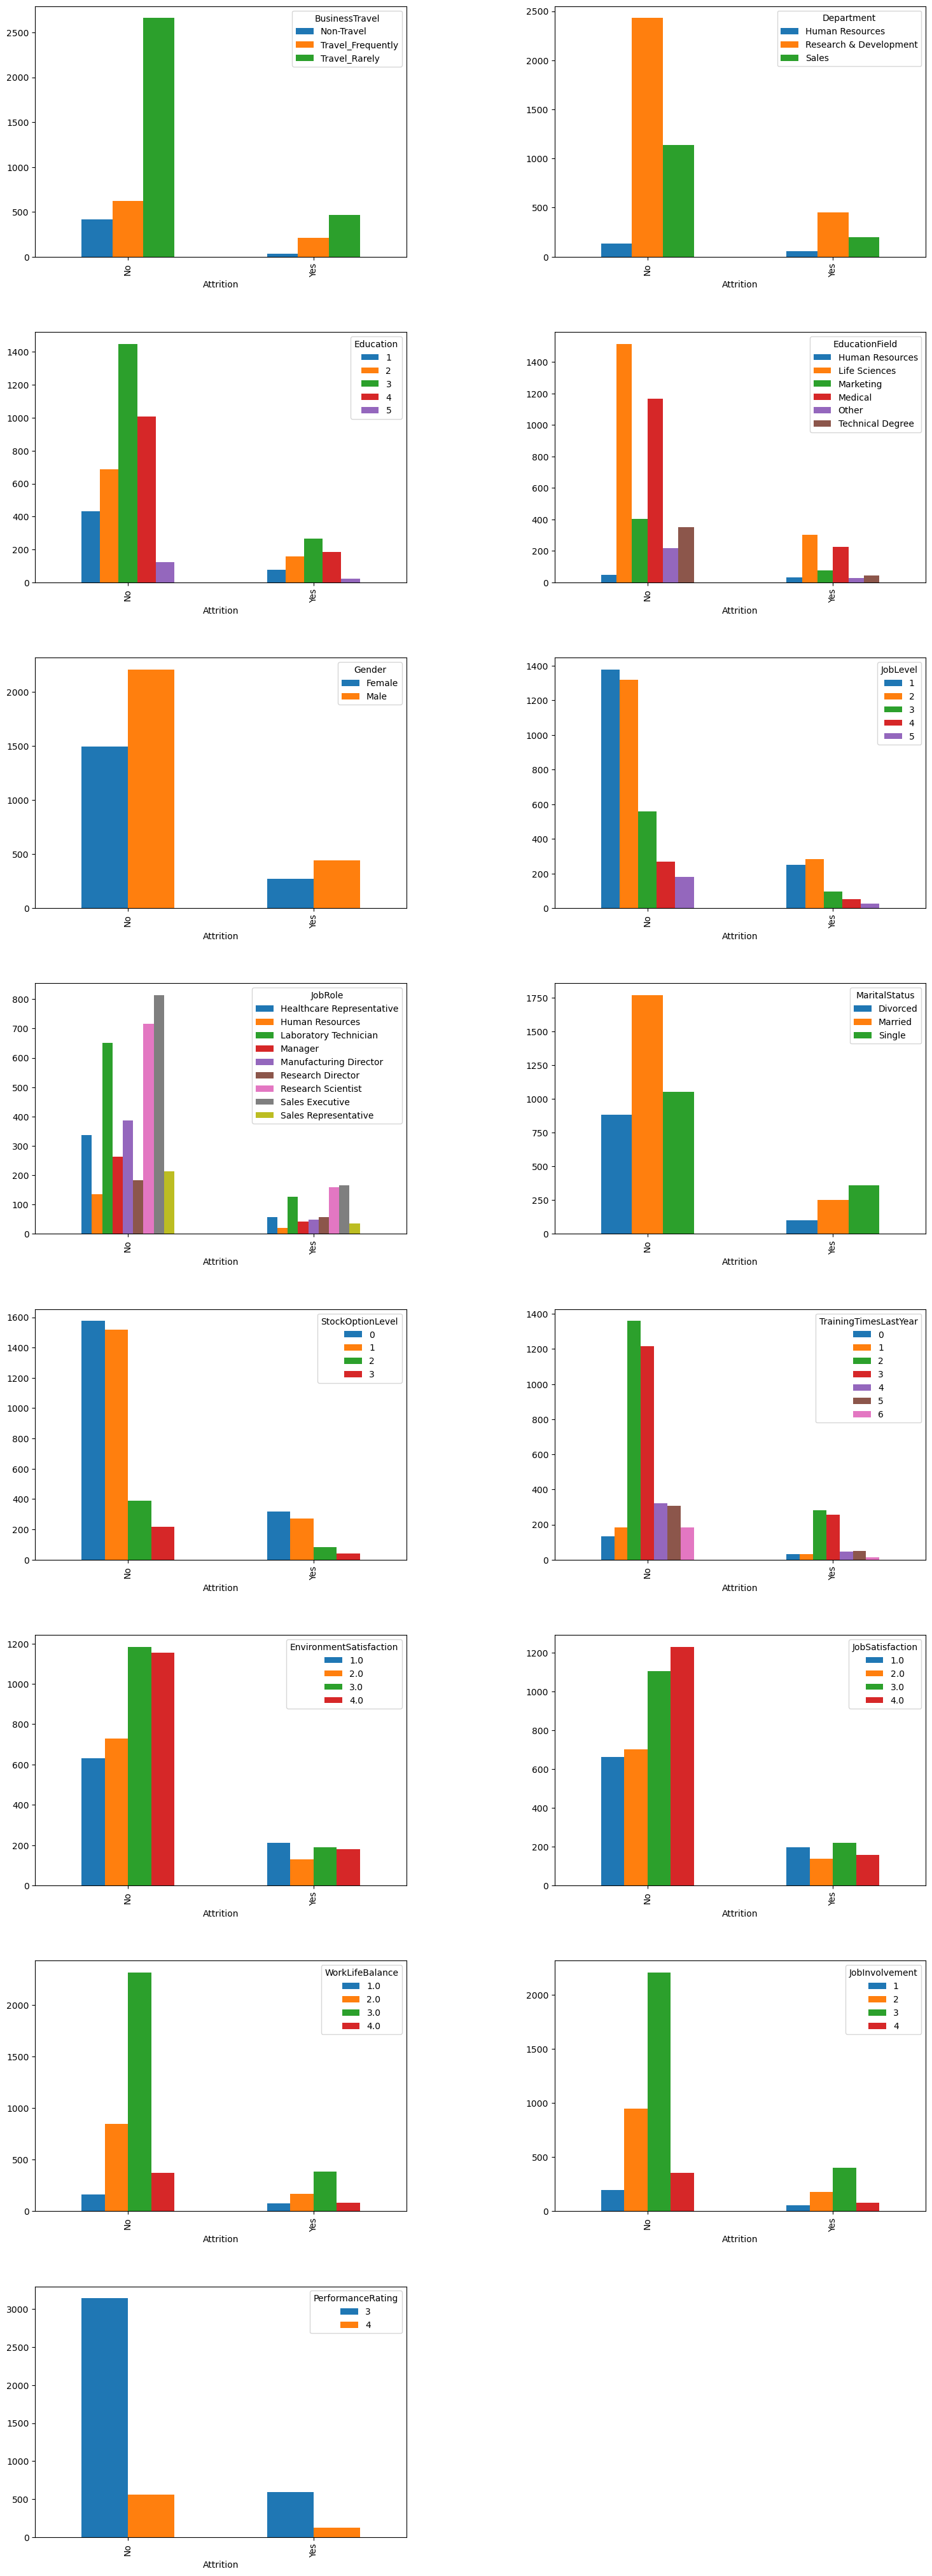

In [33]:
crosstab_plot(attr,'Attrition',attr_cat_col)

In [34]:
attr_cat_col

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating',
 'Attrition']

In [35]:
attr.shape

(4410, 25)

## Feature Selection (Using Machine Learning)

In [36]:
attr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [37]:
obj_col = list(attr.describe(include = 'object').columns)
obj_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

### Preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
def cate_label_encode(df,obj_col):
    le = LabelEncoder()
    for col in obj_col:
        df[col] = le.fit_transform(df[col])

In [40]:
cate_label_encode(attr,obj_col)

In [41]:
attr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,0,1,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,0,1,6,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,4,7,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,3,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,1,7,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
input_data = attr.drop(columns=['Attrition'],axis=1)
input_data.shape

(4410, 24)

In [44]:
output_data = attr.Attrition
output_data.shape

(4410,)

In [45]:
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,2,2,6,2,1,0,1,0,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,10,1,1,0,1,6,2,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,1,1,17,4,4,1,4,7,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,1,2,5,1,1,3,1,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,2,1,10,1,3,1,1,7,2,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [46]:
input_data_scaled = pd.DataFrame(MinMaxScaler().fit_transform(input_data),columns=input_data.columns)
input_data_scaled.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,1.0,1.0,0.178571,0.25,0.2,0.0,0.00,0.000,0.5,...,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0
1,0.309524,0.5,0.5,0.321429,0.00,0.2,0.0,0.00,0.750,1.0,...,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0
2,0.333333,0.5,0.5,0.571429,0.75,0.8,1.0,0.75,0.875,0.5,...,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0
3,0.476190,0.0,0.5,0.035714,1.00,0.2,1.0,0.50,0.125,0.5,...,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0
4,0.333333,1.0,0.5,0.321429,0.00,0.6,1.0,0.00,0.875,1.0,...,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0


### Remove Multicollinearity

In [47]:
input_data_scaled.corr()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.024751,-0.010846,0.006963,-0.035706,0.043194,-0.039352,-0.002884,0.011422,-0.095029,...,0.680340,-0.027308,0.311309,0.216513,0.202089,0.009699,-0.002712,-0.020524,0.018196,-0.025563
BusinessTravel,0.024751,1.000000,-0.010982,0.024616,0.002755,-0.015462,-0.039243,0.046111,-0.027194,0.024001,...,0.033986,-0.041888,-0.014575,-0.032591,-0.022636,0.004464,-0.031992,-0.011821,0.003121,-0.017836
Department,-0.010846,-0.010982,1.000000,0.012134,-0.004597,0.013720,0.003158,0.002923,-0.025466,-0.044619,...,-0.019718,0.012866,0.010078,0.014845,0.018016,-0.006792,0.028323,0.021840,0.006228,-0.024604
DistanceFromHome,0.006963,0.024616,0.012134,1.000000,-0.008638,-0.024665,-0.044173,-0.037329,-0.010293,-0.027893,...,0.009314,-0.009001,0.031684,0.002290,0.021584,0.020113,-0.011532,0.008305,-0.001837,0.036418
Education,-0.035706,0.002755,-0.004597,-0.008638,1.000000,0.012329,-0.016547,0.045746,0.030155,0.024991,...,-0.010813,0.010472,0.006080,0.022490,0.005358,-0.045636,-0.006259,-0.005610,-0.018279,-0.035591
EducationField,0.043194,-0.015462,0.013720,-0.024665,0.012329,1.000000,-0.005634,-0.019528,0.013106,-0.051409,...,0.021724,-0.021793,0.023120,0.048181,0.021664,-0.009988,-0.024668,-0.030210,0.013872,-0.005614
Gender,-0.039352,-0.039243,0.003158,-0.044173,-0.016547,-0.005634,1.000000,-0.026854,0.003724,-0.009132,...,-0.027616,-0.030167,-0.017277,-0.021812,0.004438,-0.023277,0.016298,-0.032373,0.025768,0.051586
JobLevel,-0.002884,0.046111,0.002923,-0.037329,0.045746,-0.019528,-0.026854,1.000000,-0.014763,-0.022021,...,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251,-0.024540,-0.019896,-0.027763,-0.012630,-0.002474
JobRole,0.011422,-0.027194,-0.025466,-0.010293,0.030155,0.013106,0.003724,-0.014763,1.000000,0.022888,...,-0.012715,0.051744,-0.012886,-0.014635,0.010695,-0.026068,-0.019497,0.020331,-0.029524,0.003355
MaritalStatus,-0.095029,0.024001,-0.044619,-0.027893,0.024991,-0.051409,-0.009132,-0.022021,0.022888,1.000000,...,-0.077333,0.012798,-0.059986,-0.030915,-0.038570,-0.004304,0.021740,0.014778,-0.004429,0.007791


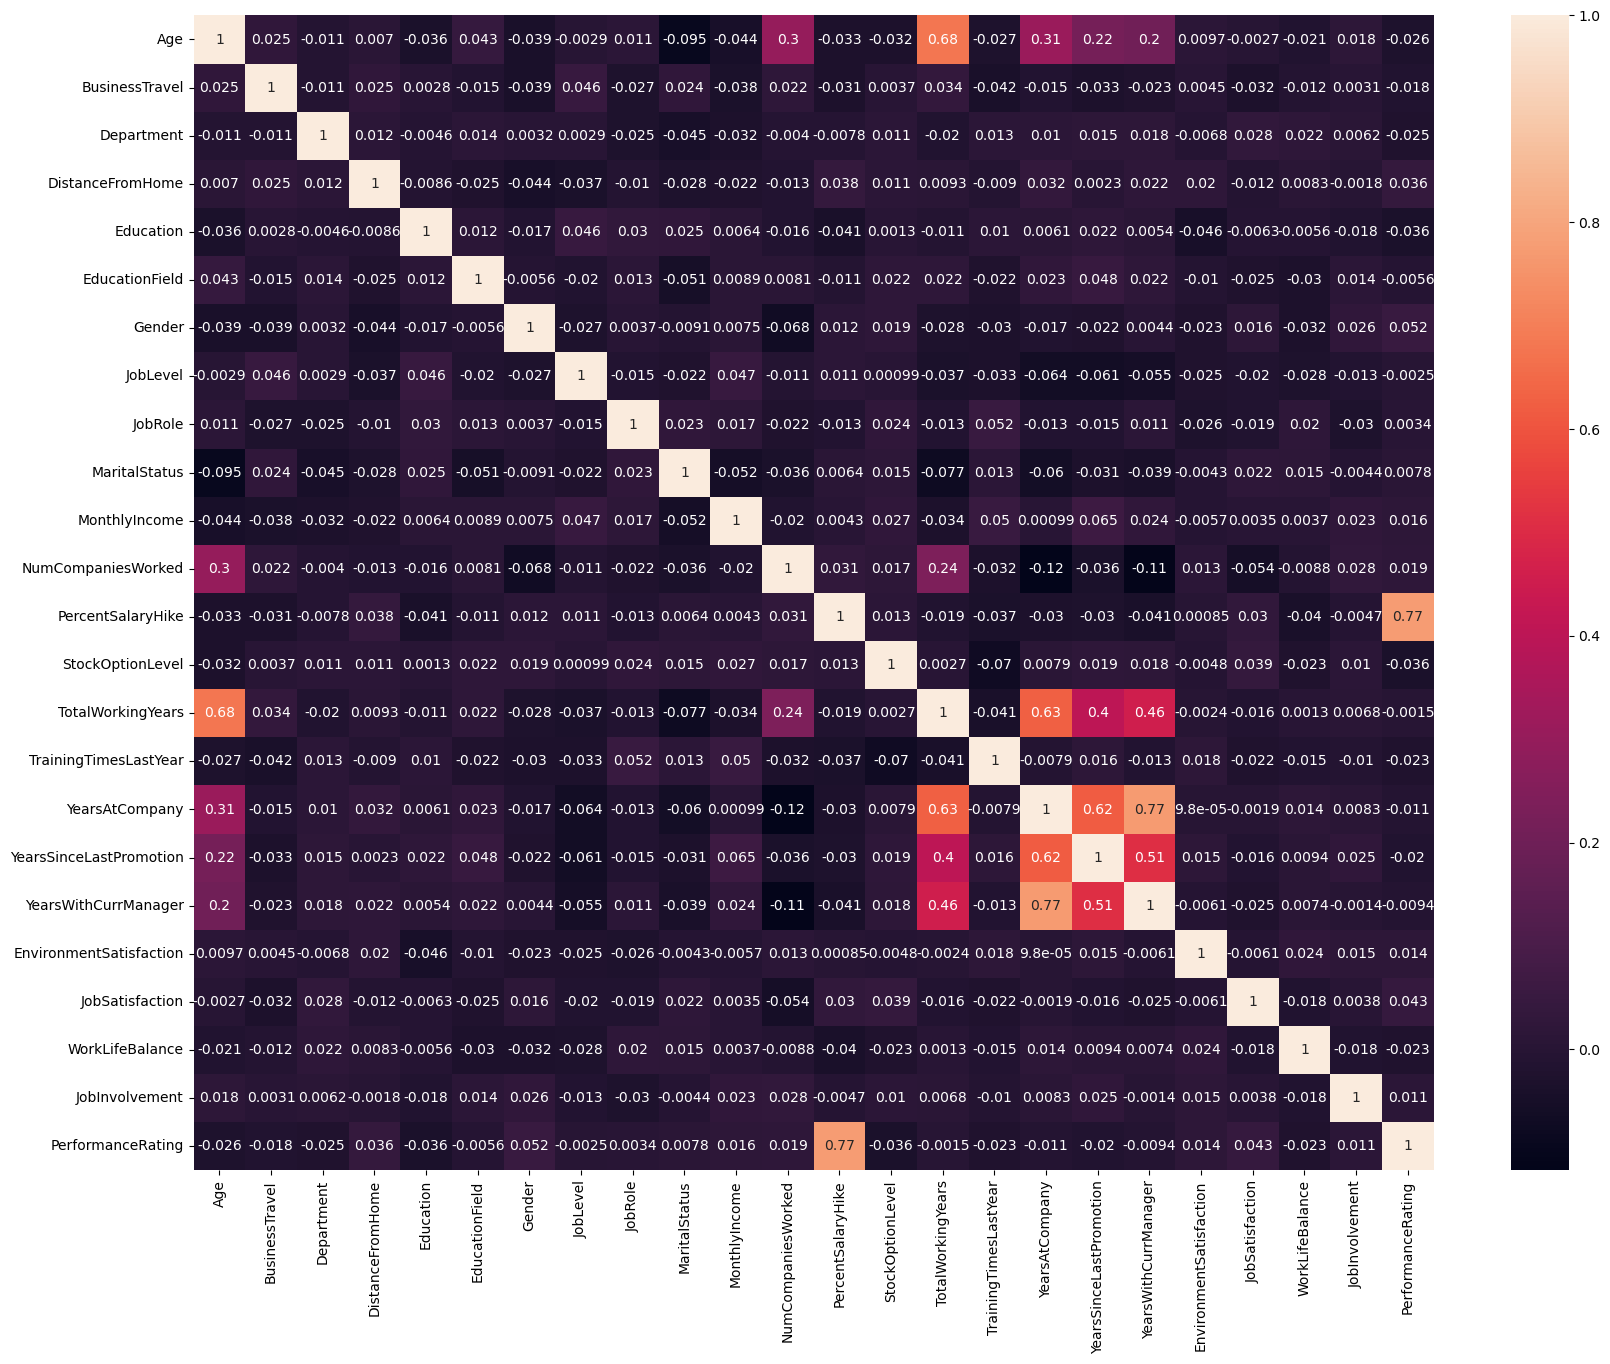

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(input_data_scaled.corr(),annot=True)
plt.show()

In [49]:
def multicollinear_features(df,threshold):
    corr_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                corr_cols.add(corr_matrix.columns[i])
    return corr_cols

In [50]:
mult_var = multicollinear_features(input_data_scaled,0.6) # taking 0.6 as threshold point
mult_var

{'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [51]:
input_data_scaled.drop(columns=mult_var,axis = 1, inplace= True)
input_data_scaled.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,0.785714,1.0,1.0,0.178571,0.25,0.2,0.0,0.00,0.000,0.5,0.637546,0.111111,0.000000,0.000000,1.000000,0.666667,1.000000,0.333333,0.666667
1,0.309524,0.5,0.5,0.321429,0.00,0.2,0.0,0.00,0.750,1.0,0.167457,0.000000,0.857143,0.333333,0.500000,0.666667,0.333333,1.000000,0.333333
2,0.333333,0.5,0.5,0.571429,0.75,0.8,1.0,0.75,0.875,0.5,0.964666,0.111111,0.285714,1.000000,0.333333,0.333333,0.333333,0.000000,0.666667
3,0.476190,0.0,0.5,0.035714,1.00,0.2,1.0,0.50,0.125,0.5,0.385045,0.333333,0.000000,1.000000,0.833333,1.000000,1.000000,0.666667,0.333333
4,0.333333,1.0,0.5,0.321429,0.00,0.6,1.0,0.00,0.875,1.0,0.070195,0.444444,0.071429,0.666667,0.333333,1.000000,0.000000,0.666667,0.666667


In [52]:
input_data_scaled.shape

(4410, 19)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(input_data_scaled,output_data,test_size=0.2,random_state=4)

**This is a binary classification problem(We have 0 and 1 as output),so we use random forest classifier as ml algorithm to extract features**

In [191]:
from sklearn.ensemble import RandomForestClassifier

### 1. Forward Selection

In [192]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [193]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100,n_jobs=-1),
                                                     k_features=(1,19),
                                                     forward=True,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring="accuracy",
                                                     cv=10).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   51.7s finished



[2024-06-06 11:44:25] Features: 1/19 -- score: 0.9492595930981199[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   54.6s finished



[2024-06-06 11:45:20] Features: 2/19 -- score: 0.9835557236672676[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   48.6s finished



[2024-06-06 11:46:08] Features: 3/19 -- score: 0.9858212078289981[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_job

In [194]:
forward_feature_selection.k_feature_names_

('Age',
 'BusinessTravel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'StockOptionLevel',
 'JobInvolvement')

In [195]:
len(forward_feature_selection.k_feature_names_)

7

In [196]:
forward_feature_selection.k_score_  # accuracy

0.9900745235642544

### 2. Backward Elimination

In [197]:
backward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100,n_jobs=-1),
                                                     k_features=(1,19),
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring="accuracy",
                                                     cv=10).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.0min finished



[2024-06-06 12:01:45] Features: 18/1 -- score: 0.9872400527942313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   57.5s finished



[2024-06-06 12:02:43] Features: 17/1 -- score: 0.9872400527942313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   54.6s finished



[2024-06-06 12:03:38] Features: 16/1 -- score: 0.9869567666752511[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_job

In [198]:
backward_feature_selection.k_feature_names_

('Age',
 'BusinessTravel',
 'EducationField',
 'JobRole',
 'MonthlyIncome',
 'JobInvolvement')

In [199]:
len(backward_feature_selection.k_feature_names_)

6

In [200]:
backward_feature_selection.k_score_

0.9889413790883337

### 3. L1 Regularization

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [204]:
logistic =  LogisticRegression(C=0.1,solver="liblinear",penalty = "l1")

In [205]:
logistic.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [206]:
L1_Regularization = SelectFromModel(logistic,prefit=True)

In [207]:
list(L1_Regularization.get_feature_names_out(input_features=X_train.columns))

['Age',
 'Department',
 'Education',
 'EducationField',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [208]:
len(L1_Regularization.get_feature_names_out(input_features=X_train.columns))

10

In [209]:
X_train_l1 = L1_Regularization.transform(X_train)
X_test_l1 = L1_Regularization.transform(X_test)

C:\Users\SWARNASASH\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names

  warnings.warn(

C:\Users\SWARNASASH\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names

  warnings.warn(


In [210]:
X_train_l1.shape

(3528, 10)

In [211]:
from sklearn.metrics import accuracy_score

In [212]:
y_pred = logistic.predict(X_test)

In [213]:
accuracy_score(y_test,y_pred)

0.8401360544217688

In [214]:
logistic_l1 =  LogisticRegression(C=0.1,solver="liblinear",penalty = "l1")

In [215]:
logistic_l1.fit(X_train_l1,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [216]:
y_pred_l1 = logistic_l1.predict(X_test_l1)

In [217]:
accuracy_score(y_test,y_pred_l1)

0.8401360544217688

### 4. L2 Regularization

In [271]:
logistic =  LogisticRegression(C=10,solver="liblinear",penalty = "l2")

In [272]:
logistic.fit(X_train,y_train)

LogisticRegression(C=10, solver='liblinear')

In [273]:
L2_Regularization = SelectFromModel(logistic,prefit=True)

In [274]:
list(L2_Regularization.get_feature_names_out(input_features=X_train.columns))

['Age',
 'EducationField',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [275]:
len(L2_Regularization.get_feature_names_out(input_features=X_train.columns))

8

In [276]:
X_train_l2 = L2_Regularization.transform(X_train)
X_test_l2 = L2_Regularization.transform(X_test)

C:\Users\SWARNASASH\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names

  warnings.warn(

C:\Users\SWARNASASH\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names

  warnings.warn(


In [277]:
y_pred = logistic.predict(X_test)

In [278]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [279]:
logistic_l2 =  LogisticRegression(C=10,solver="liblinear",penalty = "l2")

In [280]:
logistic_l2.fit(X_train_l2,y_train)

LogisticRegression(C=10, solver='liblinear')

In [281]:
y_pred_l2 = logistic_l2.predict(X_test_l2)

In [282]:
accuracy_score(y_test,y_pred_l2)

0.8503401360544217

**We get 7 features from Forward Selection method that gives best accuracy among all the feature selection methods**

In [285]:
final_features = list(forward_feature_selection.k_feature_names_)
final_features

['Age',
 'BusinessTravel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'StockOptionLevel',
 'JobInvolvement']

In [286]:
full_model = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train,y_train)
y_pred_full = full_model.predict(X_test)
accuracy_score(y_test,y_pred_full)

1.0

In [289]:
X_train_final = forward_feature_selection.transform(X_train)
X_test_final = forward_feature_selection.transform(X_test)

In [290]:
final_model = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train_final,y_train)
y_pred_final = final_model.predict(X_test_final)
accuracy_score(y_test,y_pred_final)

1.0

**Interpretetion:**
    
The feartures for which attrition is occurring in the company is :

        1.Age
        2.BusinessTravel
        3.JobRole
        4.MaritalStatus
        5.MonthlyIncome
        6.StockOptionLevel
        7.JobInvolvement
    